In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.matlib as npm
import torch

from athena.active import ActiveSubspaces
from athena.nll import NonlinearLevelSet

from helper_functions import *

torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:
np.random.seed(50)

# global parameters
n_train = 2000
n_params = 2

example = 1

In [3]:
### Training data
x_np = np.random.uniform(low=0, high=1, size=(n_train, n_params))
f = test_func(x_np, example)[0]
df_np = test_func(x_np, example)[1]

In [4]:
### Validation data
n_valid = 2000
x_valid = np.random.uniform(low=0, high=1, size=(n_valid, n_params))

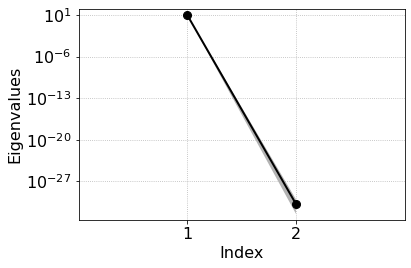

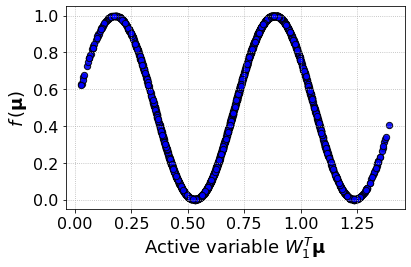

In [5]:
# Active subspace
ss = ActiveSubspaces(1)
ss.fit(inputs=x_np, gradients=df_np)

ss.plot_eigenvalues(figsize=(6, 4))

ss.plot_sufficient_summary(x_np, f, figsize=(6, 4))

In [7]:
orig_sens = as_sensitivity(ss, x_valid, example)[0]
as_sens = as_sensitivity(ss, x_valid, example)[1]

orig_sens_norm = np.empty(orig_sens.shape)
as_sens_norm = np.empty(as_sens.shape)

In [8]:
for i in range(orig_sens_norm.size):
    orig_sens_norm[i] = (orig_sens[i]/sum(orig_sens)) * 100

for i in range(as_sens_norm.size):
    as_sens_norm[i] = (as_sens[i]/sum(as_sens)) * 100

In [10]:
# NLL
nll = NonlinearLevelSet(n_layers=10,
                        active_dim=1, 
                        lr=0.01,
                        epochs=290,
                        dh=0.25,
                        optimizer=torch.optim.SGD)

x_torch = torch.as_tensor(x_np, dtype=torch.double)
df_torch = torch.as_tensor(df_np, dtype=torch.double)

In [11]:
nll.train(inputs=x_torch,
          gradients=df_torch,
          interactive=False)

epoch = 0, loss = 1.5686250368741577
epoch = 10, loss = 0.6379321872485072
epoch = 20, loss = 0.08288535620320397
epoch = 30, loss = 0.07055991601223464
epoch = 40, loss = 0.06169791693269401
epoch = 50, loss = 0.05572845993546216
epoch = 60, loss = 0.05182254618530307
epoch = 70, loss = 0.04918789244136883
epoch = 80, loss = 0.04726409860431747
epoch = 90, loss = 0.04572432704870982
epoch = 100, loss = 0.04439813815959832
epoch = 110, loss = 0.04320165360183484
epoch = 120, loss = 0.042094399953959395
epoch = 130, loss = 0.041056454312149465
epoch = 140, loss = 0.04007722997435587
epoch = 150, loss = 0.039150227546601905
epoch = 160, loss = 0.03827067886421263
epoch = 170, loss = 0.03743454443551083
epoch = 180, loss = 0.03663812289988284
epoch = 190, loss = 0.03587792459790329
epoch = 200, loss = 0.03515065015921319
epoch = 210, loss = 0.03445320380526173
epoch = 220, loss = 0.033782712027753896
epoch = 230, loss = 0.03313653677252899
epoch = 240, loss = 0.03251228029075469
epoch = 2

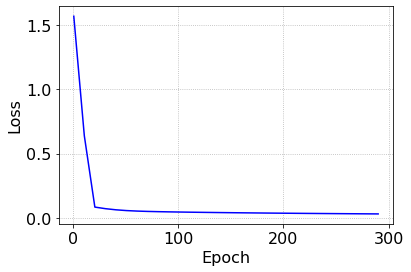

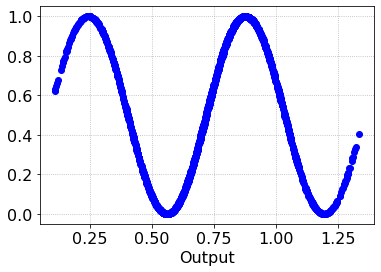

In [12]:
nll.plot_loss(figsize=(6, 4))

nll.plot_sufficient_summary(x_torch, f, figsize=(6, 4))

In [14]:
nll_sens = nll_sensitivity(nll, x_valid, example)[1]

nll_sens_norm = np.empty(nll_sens.shape)

for i in range(nll_sens_norm.size):
    nll_sens_norm[i] = (nll_sens[i]/sum(nll_sens)) * 100

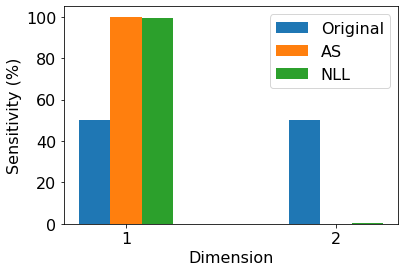

In [15]:
x_labels = [i for i in range(1, n_params+1)]
w = 0.15
pivot = np.arange(len(x_labels))
bar1 = [p - w for p in pivot]
bar2 = [p for p in pivot]
bar3 = [p + w for p in pivot]

plt.bar(bar1, orig_sens_norm, w, label="Original")
plt.bar(bar2, as_sens_norm, w, label="AS")
plt.bar(bar3, nll_sens_norm, w, label="NLL")


plt.xticks(pivot, x_labels) 
plt.xlabel("Dimension")
plt.ylabel("Sensitivity (%)")
plt.legend()

plt.show()

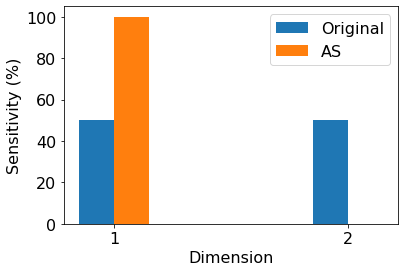

In [16]:
x_labels = [i for i in range(1, n_params+1)]
w = 0.15
pivot = np.arange(len(x_labels))
bar1 = [p - 0.5*w for p in pivot]
bar2 = [p + 0.5*w for p in pivot]
#bar3 = [p + w for p in pivot]

plt.bar(bar1, orig_sens_norm, w, label="Original")
plt.bar(bar2, as_sens_norm, w, label="AS")
#plt.bar(bar3, nll_sens_norm, w, label="NLL")


plt.xticks(pivot, x_labels) 
plt.xlabel("Dimension")
plt.ylabel("Sensitivity (%)")
plt.legend()

plt.show()

In [17]:
print(orig_sens_norm)
print(as_sens_norm)
print(nll_sens_norm)

[50. 50.]
[1.0000000e+02 4.7014104e-12]
[99.42808979  0.57191021]


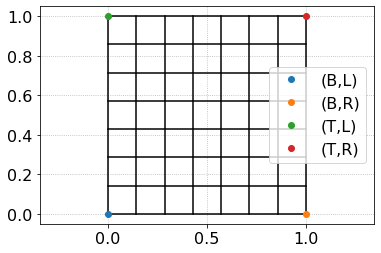

In [18]:
xx = np.linspace(0.0, 1.0, num=8)
yy = np.linspace(0.0, 1.0, num=8)
xxx, yyy = np.meshgrid(xx, yy)
mesh = np.concatenate((np.reshape(xxx, (8**2, 1)), np.reshape(yyy, (8**2, 1))), axis=1)
gridplot(mesh, Nx=8, Ny=8)

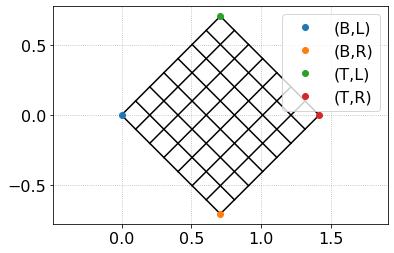

In [19]:
y, z = ss.transform(mesh)
grid_as = np.hstack((y,z))
gridplot(grid_as, Nx=8, Ny=8)

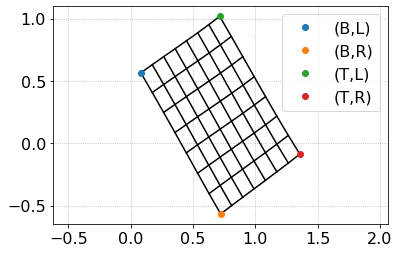

In [20]:
grid_torch = nll.forward(torch.from_numpy(mesh))
grid_nll = grid_torch.detach().numpy()
gridplot(grid_nll, Nx=8, Ny=8)